BIODIVERSITY IN NATIONAL PARKS - P. Brister 

BI DATA ANALYST PORTFOLIO PROJECT 

Introduction 


This is Data Science Portfolio project about Biodiversity in four National Parks in the United States of America (Bryce National Park, Great Smokey Mountain National Park, Yellow Stone National Park, and Yosemite National Park), that explores data about species, their classification, conservation status and the number of observations of the different species on each park. 

Here are a few questions that this project has sought to answer:
    •What is the distribution of conservation status for species?
    •What species is of most concern? 
    •Which species is more prevalent and what is their distribution amongst the parks?
    •Which species is the least prevalent amongst each national park? 
    
    
 

For this project, the inital material consits of two datasets: 'Observations' and 'Species' - in csv format and provided by Codecademy.com. 

Note: The data for this project is inspired by real data, but is mostly fictional. 

Scoping 

Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high level objectives and set the intentions for this project. The next section is the data, luckily in this project, the data is already provided but still needs to be checked of project goals can be with the available data. Thirdly, the analysis will have to be throught through, which include methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis. 


Project Goals 

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Parks service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within thier parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and ther conservation status, and those species and thier relationship to the national parks. Some questions posed: 

  •What is the distribution of conservation status for species?
  •Are certain types of species more likely to be endangered? 
  •Which species is more prevalent and what is their distribution amongst the parks?
  •Which species is the least prevalent amongst each national park? 
  

Data 

This project has two datasets that came with the package. The first csv file has information about each species and another has observations of species with park locations. This data will be used to analyze the goal of this project. 

Analysis

In this section, descriptive analysis and data visualization techniques will be employed to understand the data better. 



Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered. This section will also reflect on what has been learned through the process and if any of th questions were able or unable to be answered. This could also include limitations or if any of the analysis could have been done sing different methodologies. 

IMPORT Python Modules

In [1]:
#Import Modules 
import pandas as pd 
import numpy as py 
import seaborn as sns 
import matplotlib.pyplot as plt 


LOADING Data

Loading data into DataFrames - so that the data can be explored and visualized.  

In [2]:
#Open and create dataframe 
species_info = pd.read_csv('species_info.csv')
species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


species

The species_info.csv file contains information on the different species in the National Parks. The columns in the dataset include: 
    •Category - the category of Taxonomy for each species 
    •Scientific name - the scientific name of each species 
    •Common names - the common name of each species (important to note that there are multiple entries in one row)
    •Conservation status - the species conservation status 

In [3]:
observations = pd.read_csv('observations.csv')
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


observations 

The observations.csv file contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are: 
    •scientific name - the scientific name of each species 
    •park name - the name of the national park 
    •observations - the number of observations in the past 7 days 


Data characteristics 

check for the dimensions of the datasets' 

In [4]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


There are 5824 rows and 4 columns in the species.csv file. Notice - there are only 191 entries in the conservation_status column. Will investigate further. 

In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


There are 23926 rows and 3 columns in the observations.csv file.

EDA - Exploratory Data Analysis 

Let's explore the species data a little more in depth. 

In [6]:
species_info.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


There are 5824 entries in the category column. There are 7 unique categories, the Vascular Plant is the most frequent at 4470. 

There are 5824 entries in the scientific name column. There are 5541 scientific names and the Castor Canadensis is the most frequent at 3. 

There are 5824 entries in the common names column. There are 5504 common names and Brachythecium Moss is the most frequent at 7. I also mentioned earlier, that there seems to be mutliple values in the column name and we need to clear that up. 

There are 191 entires in the conservation_status column. There are 4 unique categories and Species of Concern is the most frequent at 161. How many NAN values are there? 

In [6]:
#Clean column_names 
species_info['common_names'] = species_info['common_names'].str.split(',').str[0]
species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,American Bison,NaN
2,Mammal,Bos taurus,Aurochs,NaN
3,Mammal,Ovis aries,Domestic Sheep,NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,Feral Hog,NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


**

In [13]:
#How many NAN values are in the conservation_status column? 
species_info.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [9]:
#review the unique values in conservation_status column 
species_info.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

There are 4 different categories in the conservation status column and their entries are: 
•Species of Concern
•Endangered 
•In Recovery 
•Threatened 

There are also 5633 entries that do not have a value. Normally NAN values must be treated carefully - however, the absense of this suggest that these values are missing because the species observed is not of concern. We are going to replace NAN with Least Concern. 

In [14]:
species_info.fillna('Least Concern', inplace=True)
species_info.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Least Concern         5633
Species of Concern     161
Threatened              10
dtype: int64

All the NAN values have been replaced with Least Concern. We now have a better outlook on this column. Currently there are 16 entries that are at risk of being endangered, 4 recovering from previously being endangered, 161 that are of concern, 10 that are at risk of extinction, and lastly 5633 that are of least concern. Before we gather a introduction - let's ensure that there are no duplicates in the dataset. 

In [16]:
#identify and delete duplicates
print(f'There are {species_info.duplicated().sum()} duplicates in the Species_info dataset.')

There are 72 duplicates in the Species_info dataset.


In [19]:
species_info.drop_duplicates(inplace=True)
#confirm that duplicated are deleted
species_info.duplicated().sum()


0

There were 72 duplicates in the species dataset. We have removed them and confirmed. Now let's take a closer look into the species_info column and create some visuals. 

In [13]:
species_info.describe()

,category,scientific_name,common_names,conservation_status
count,5752,5752,5752,5752
unique,7,5541,5297,5
top,Vascular Plant,Puma concolor,A Sedge,Least Concern
freq,4426,3,10,5569


In [20]:
species_info.groupby('category').size()

category
Amphibian              79
Bird                  507
Fish                  127
Mammal                201
Nonvascular Plant     333
Reptile                79
Vascular Plant       4426
dtype: int64

Earlier, we identified that there were 7 unique classifications in the category column and Vascular Plant was the most frequent. Now, we have a deeper insight into the unique classifications and how many species were counted in each category. 
  

In [46]:
filtered_species_info = species_info[species_info['conservation_status'] != 'Least Concern']
conservation_category_results = filtered_species_info.groupby(['conservation_status', 'category']).size()

#reshaping the result into a dataframe for easier plotting 
conservation_category = conservation_category_results.unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,69.0,4.0,24.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<Figure size 800x600 with 0 Axes>

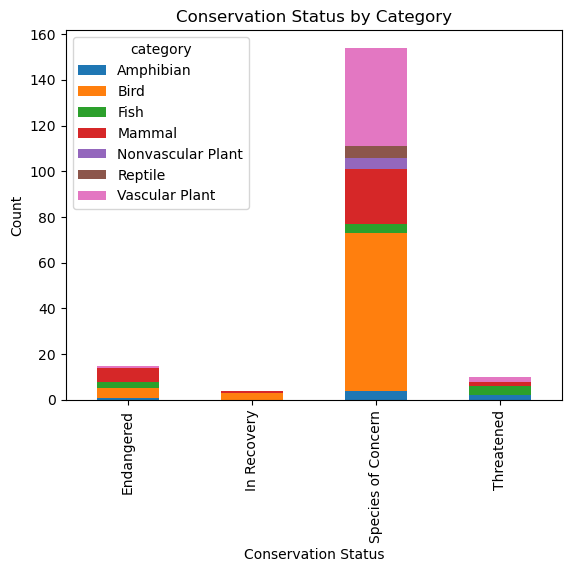

In [44]:
#visualize stacked bar chart
plt.figure(figsize=(8,6))
conservation_category.plot(kind='bar', stacked=True)
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Conservation Status by Category')
plt.show()

In [52]:
#
species_info['is_protected'] = species_info.conservation_status != 'Least Concern'


A new column is created. 

In [54]:
grouped_species_info = species_info.groupby(['category', 'is_protected']).size().unstack()
grouped_species_info


is_protected,False,True
category,,
Amphibian,72,7
Bird,431,76
Fish,116,11
Mammal,168,33
Nonvascular Plant,328,5
Reptile,74,5
Vascular Plant,4380,46


In [56]:
grouped_species_info['Percentage_protected'] = (grouped_species_info[True]/grouped_species_info.sum(axis=1)) * 100
grouped_species_info


is_protected,False,True,Percentage_protected
category,,,
Amphibian,72,7,8.860759
Bird,431,76,14.990138
Fish,116,11,8.661417
Mammal,168,33,16.417910
Nonvascular Plant,328,5,1.501502
Reptile,74,5,6.329114
Vascular Plant,4380,46,1.039313


EDA - Exploratory Data Analysis pt2. 

Let's explore the observations data a little more in depth. 

In [65]:
print(f'There are {observations.duplicated().sum()} duplicates in this dataset.')

There are 15 duplicates in this dataset.


In [66]:
#remove all duplicates in this list 
observations.drop_duplicates(inplace=True)


In [73]:
observations.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [67]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [68]:
observations_by_park = observations.groupby('park_name').sum('observations')
observations_by_park

,observations
park_name,
Bryce National Park,575901
Great Smoky Mountains National Park,431378
Yellowstone National Park,1442314
Yosemite National Park,862836


The dataset consist of data from 4 national parks: 
•Byrce National Park 
•Great Smokey Mountains National Park 
•Yellowstone National Park 
•Yosemite National Park 


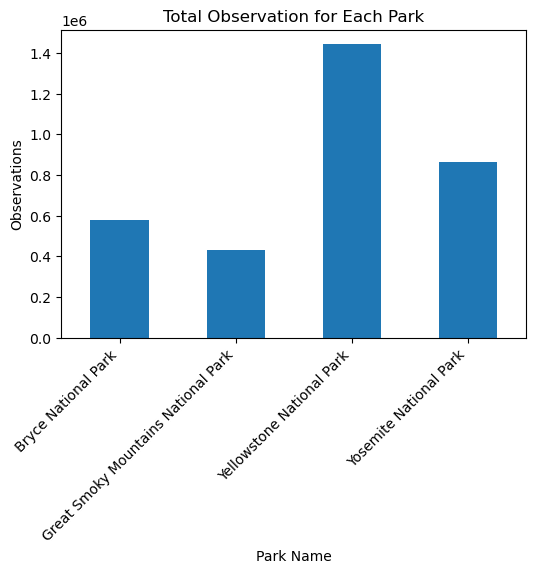

There have been 3312429 recorded over the last 7 days.


In [70]:
#Visualize The number of observations
observations_by_park.plot(kind='bar', figsize=(6,4), legend=False)
plt.xlabel('Park Name')
plt.ylabel('Observations')
plt.title('Total Observation for Each Park')
plt.xticks(rotation=45, ha='right')
plt.show()

print(f'There have been {observations.observations.sum()} recorded over the last 7 days.')

There were no missing values in the dataset. However, there were 15 duplicates. They have been removed.

Now we are going to merge the DataFrames together. 


In [31]:
merged_data = observations.merge(species_info, on='scientific_name', how='left')
merged_data.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,Purple Vetch,Least Concern
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Least Concern
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Least Concern
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Least Concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Least Concern
5,Elymus virginicus var. virginicus,Yosemite National Park,112,Vascular Plant,Virginia Wildrye,Least Concern
6,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,Least Concern
7,Elymus multisetus,Great Smoky Mountains National Park,39,Vascular Plant,Big Squirreltail,Least Concern
8,Lysimachia quadrifolia,Yosemite National Park,168,Vascular Plant,Whorled Loosestrife,Least Concern
9,Diphyscium cumberlandianum,Yellowstone National Park,250,Nonvascular Plant,Cumberland Diphyscium Moss,Least Concern


In [32]:
merged_data.isnull().sum()

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64

After merging the DataFrames, it was important to ensure that there were no missing values.

Now that the two datasets have been merged, lets continue to clean it up beofre we dive into out analysis. I've decided to rename the park_name to National Park and remove National Park from each entry for cleaner look. 

In [38]:
merged_data = merged_data.rename(columns ={'park_name': 'National_Park'})
merged_data.head(10)

,scientific_name,National_Park,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,Purple Vetch,Least Concern
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Least Concern
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Least Concern
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Least Concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Least Concern
5,Elymus virginicus var. virginicus,Yosemite National Park,112,Vascular Plant,Virginia Wildrye,Least Concern
6,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,Least Concern
7,Elymus multisetus,Great Smoky Mountains National Park,39,Vascular Plant,Big Squirreltail,Least Concern
8,Lysimachia quadrifolia,Yosemite National Park,168,Vascular Plant,Whorled Loosestrife,Least Concern
9,Diphyscium cumberlandianum,Yellowstone National Park,250,Nonvascular Plant,Cumberland Diphyscium Moss,Least Concern


In [39]:
merged_data['National_Park'] = merged_data['National_Park'].apply(lambda x: x.replace(' National Park', ''))
merged_data.head(10)

,scientific_name,National_Park,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains,68,Vascular Plant,Purple Vetch,Least Concern
1,Neovison vison,Great Smoky Mountains,77,Mammal,American Mink,Least Concern
2,Prunus subcordata,Yosemite,138,Vascular Plant,Klamath Plum,Least Concern
3,Abutilon theophrasti,Bryce,84,Vascular Plant,Velvetleaf,Least Concern
4,Githopsis specularioides,Great Smoky Mountains,85,Vascular Plant,Common Bluecup,Least Concern
5,Elymus virginicus var. virginicus,Yosemite,112,Vascular Plant,Virginia Wildrye,Least Concern
6,Spizella pusilla,Yellowstone,228,Bird,Field Sparrow,Least Concern
7,Elymus multisetus,Great Smoky Mountains,39,Vascular Plant,Big Squirreltail,Least Concern
8,Lysimachia quadrifolia,Yosemite,168,Vascular Plant,Whorled Loosestrife,Least Concern
9,Diphyscium cumberlandianum,Yellowstone,250,Nonvascular Plant,Cumberland Diphyscium Moss,Least Concern


In [41]:
merged_data = merged_data.rename(columns={'common_names': 'common_name'})
merged_data.head()

,scientific_name,National_Park,observations,category,common_name,conservation_status
0,Vicia benghalensis,Great Smoky Mountains,68,Vascular Plant,Purple Vetch,Least Concern
1,Neovison vison,Great Smoky Mountains,77,Mammal,American Mink,Least Concern
2,Prunus subcordata,Yosemite,138,Vascular Plant,Klamath Plum,Least Concern
3,Abutilon theophrasti,Bryce,84,Vascular Plant,Velvetleaf,Least Concern
4,Githopsis specularioides,Great Smoky Mountains,85,Vascular Plant,Common Bluecup,Least Concern


In [46]:
merged_data = 

0

** I have identified the duplicates - now i need to remove them from the list. Will revist later. 

Analysis 


5. Conclusions